Install required modules

In [1]:
%pip install kagglehub 
%pip install numpy pandas matplotlib seaborn scikit-learn scikit-image tqdm xgboost

Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 55.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 54.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 57.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 60.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 60.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 58.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━

Load Modules

In [2]:
# Load Modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Download the dataset and save it localy

In [3]:
import os
import kagglehub
import shutil
import tqdm

# Create data directory if it doesn't exist
os.makedirs("./data", exist_ok=True)

# Download the dataset (this will go to a temporary location)
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

# Move the downloaded file to your desired location
path = path+"/WA_Fn-UseC_-HR-Employee-Attrition.csv"
shutil.copy(path, "./data/ibm_hr_dataset.csv")

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 50.1k/50.1k [00:00<00:00, 2.62MB/s]

Extracting files...


'./data/ibm_hr_dataset.csv'

Load the dataset

In [4]:
"""Load and prepare the IBM HR Analytics dataset"""
df = pd.read_csv('./data/ibm_hr_dataset.csv')

# Convert categorical variables to numeric
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 
                        'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

df, df_encoded

(      Age Attrition     BusinessTravel  DailyRate              Department  \
 0      41       Yes      Travel_Rarely       1102                   Sales   
 1      49        No  Travel_Frequently        279  Research & Development   
 2      37       Yes      Travel_Rarely       1373  Research & Development   
 3      33        No  Travel_Frequently       1392  Research & Development   
 4      27        No      Travel_Rarely        591  Research & Development   
 ...   ...       ...                ...        ...                     ...   
 1465   36        No  Travel_Frequently        884  Research & Development   
 1466   39        No      Travel_Rarely        613  Research & Development   
 1467   27        No      Travel_Rarely        155  Research & Development   
 1468   49        No  Travel_Frequently       1023                   Sales   
 1469   34        No      Travel_Rarely        628  Research & Development   
 
       DistanceFromHome  Education EducationField  EmployeeCou

Basic overview of company wide attrition, yes have left the company, while no have not left the company.

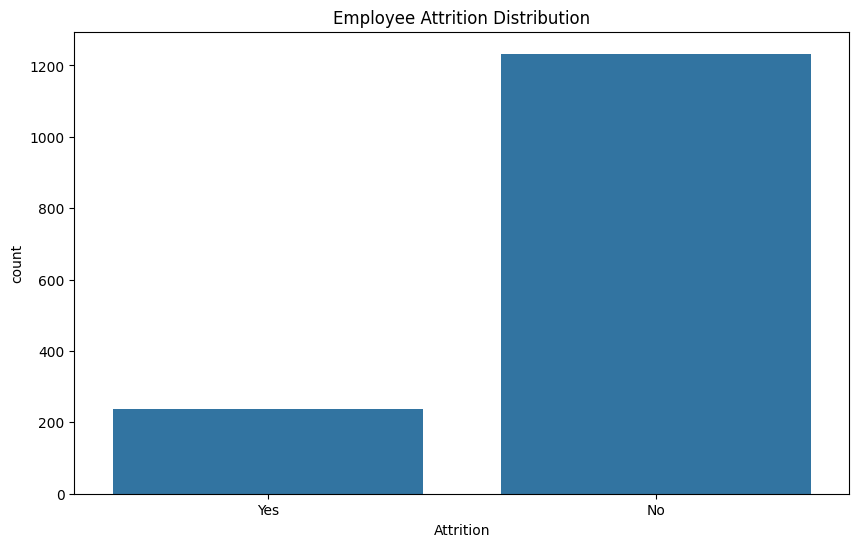


Attrition Distribution:
No: 1233 employees (83.9%)
Yes: 237 employees (16.1%)


In [5]:
# Cell 1: Basic Attrition Distribution
# Visualize overall attrition distribution
attrition_dist = df['Attrition'].value_counts()
attrition_pct = df['Attrition'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attrition')
plt.title('Employee Attrition Distribution')
plt.show()

print("\nAttrition Distribution:")
for label, count, percentage in zip(attrition_dist.index, attrition_dist.values, attrition_pct.values):
    print(f"{label}: {count} employees ({percentage:.1f}%)")

In this series of box we see attrition rate for sevreal features.  Yes employees are leaving the company, and no employees are staying.

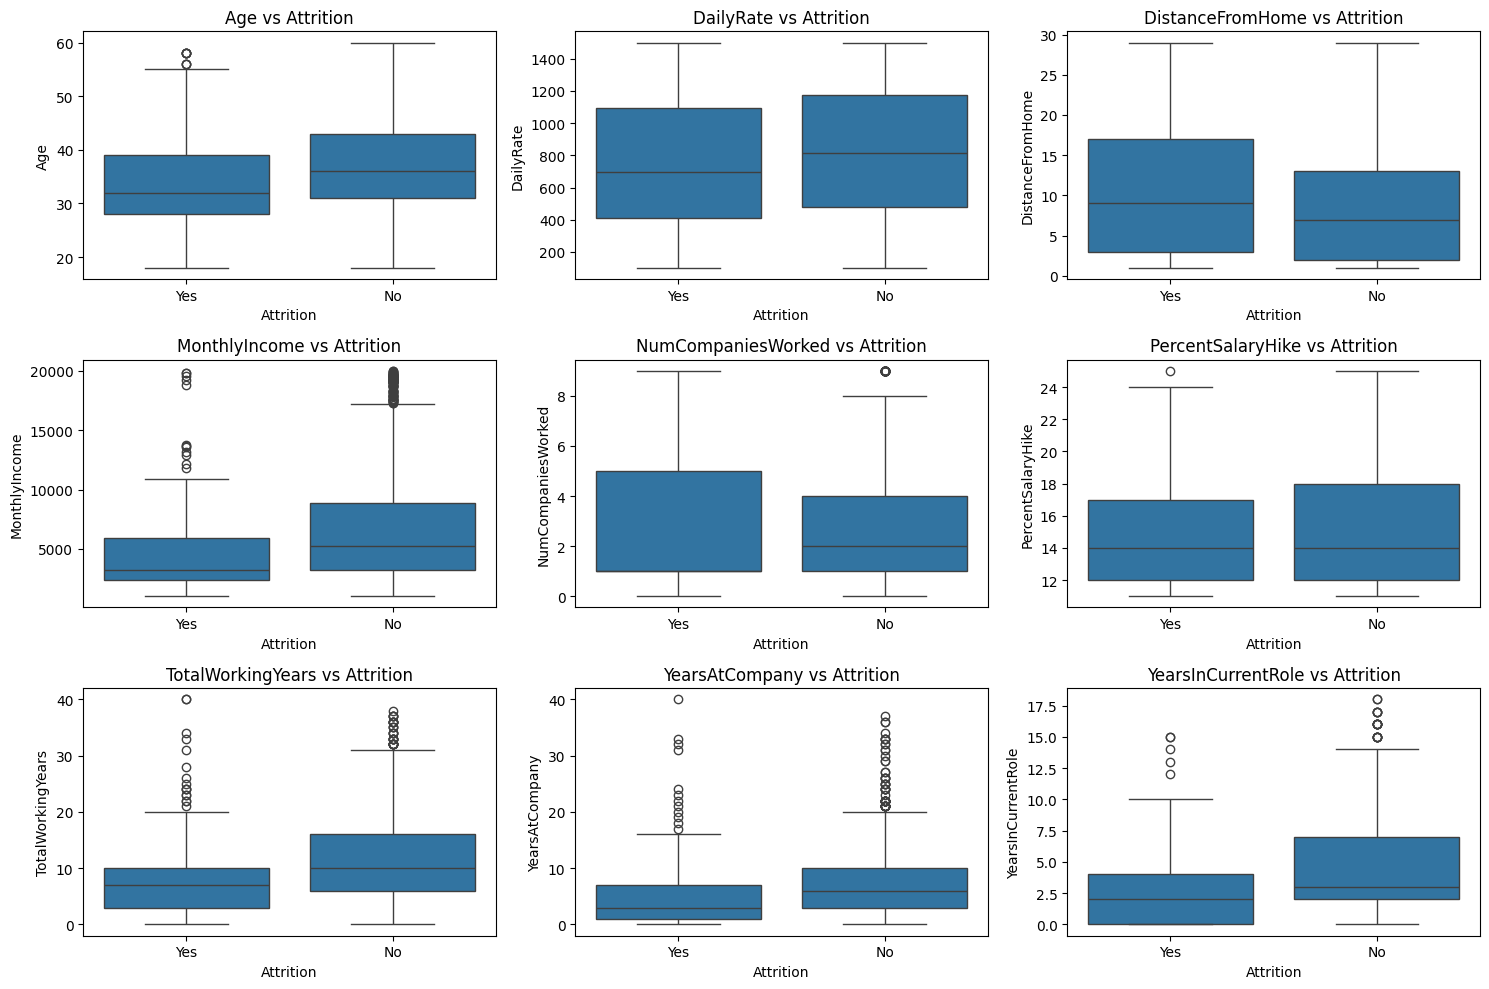

In [6]:
# Cell 2: Numerical Features Analysis
# Analyze numerical features vs attrition
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 
                     'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 
                     'YearsAtCompany', 'YearsInCurrentRole']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='Attrition', y=feature)
    plt.title(f'{feature} vs Attrition')
plt.tight_layout()
plt.show()

Here we look at the attrition rate for each category of the categorical features.  We can see that employees who have left the company are more likely to have a higher distance from home, in Sales, and are single with a lower monthly income and education and work more overtime.

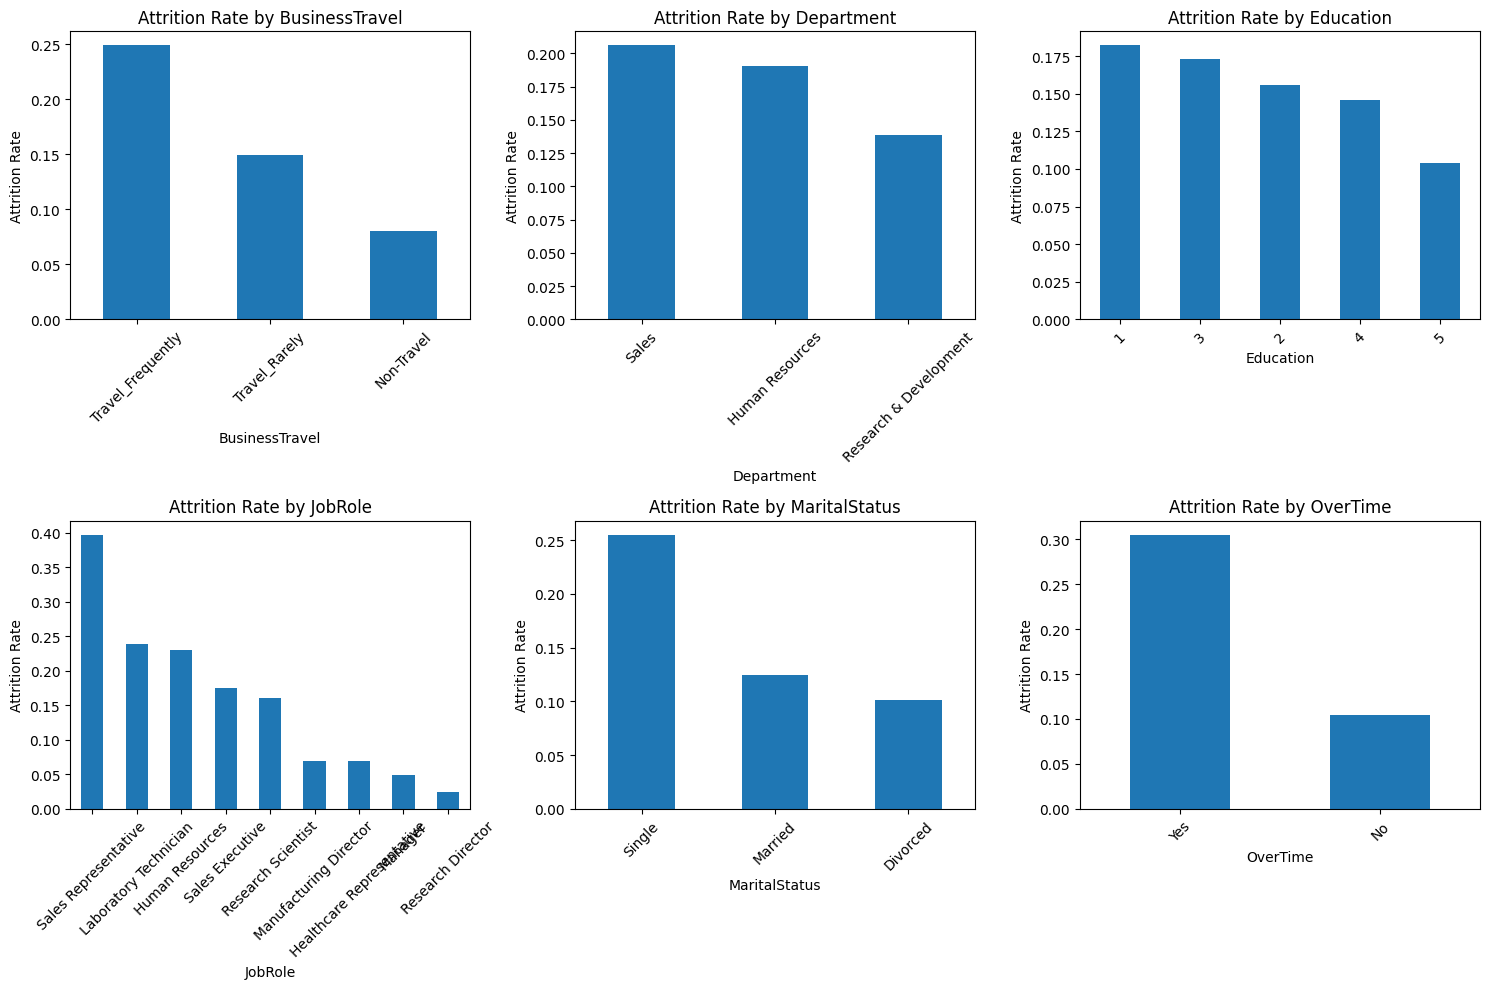

In [7]:
# Cell 3: Categorical Features Analysis
# Analyze categorical features vs attrition
categorical_features = ['BusinessTravel', 'Department', 'Education', 
                       'JobRole', 'MaritalStatus', 'OverTime']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    df_pct = df.groupby(feature)['Attrition'].value_counts(normalize=True).unstack()
    df_pct['Yes'].sort_values(ascending=False).plot(kind='bar')
    plt.title(f'Attrition Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Attrition Rate')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here we handle our preprocessing.  We convert our categorical variables to numeric using one hot encoding.  We also convert our target variable to numeric.  We then split our data into features and target.

In [8]:
# Cell 4: Data Preprocessing
# Convert categorical variables to numeric
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Over18']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Convert 'Attrition' to numeric
df_encoded['Attrition'] = (df['Attrition'] == 'Yes').astype(int)

# Split features and target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now that we have pre processed our data we can train our model.  We use a random forest classifier.  We then make predictions and print the classification report.

In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Calculate scale_pos_weight based on class imbalance
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Define parameter grid for GridSearchCV with an extended range of values if desired
param_grid = {
    'scale_pos_weight': [scale_pos_weight],
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9],           # Optional additional values
    'colsample_bytree': [0.8, 0.9]     # Optional additional values
}

# Initialize the model
xgb_model = XGBClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_xgb = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_xgb.predict(X_test_scaled)

# Print classification report
print("Model Performance after Tuning with 5-Fold Cross-Validation:")
print(classification_report(y_test, y_pred))
print("Best Parameters Found:", grid_search.best_params_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Model Performance after Tuning with 5-Fold Cross-Validation:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       255
           1       0.41      0.49      0.45        39

    accuracy                           0.84       294
   macro avg       0.67      0.69      0.68       294
weighted avg       0.85      0.84      0.85       294

Best Parameters Found: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 200, 'scale_pos_weight': 4.9393939393939394, 'subsample': 0.8}


Here we look at the importance of each feature in predicting attrition.  We can see that the top features are the monthly income, age and overtime.

<Figure size 1200x600 with 0 Axes>

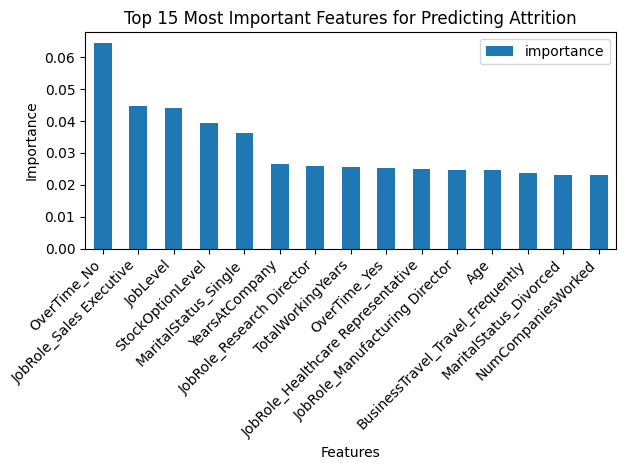

In [10]:
# Cell 6: Feature Importance Visualization
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_xgb.feature_importances_
})

# Plot top 15 most important features
plt.figure(figsize=(12, 6))
feature_importance.sort_values('importance', ascending=False).head(15).plot(
    x='feature', y='importance', kind='bar')
plt.title('Top 15 Most Important Features for Predicting Attrition')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Here we determine what a high attrition employee is.  We can see that they are older, have a higher monthly income, have worked at more companies, and have a higher percent salary hike.


In [11]:
# Profile of High Attrition Employees
# Calculate mean values for numerical features by attrition status
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 
                     'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 
                     'YearsAtCompany', 'YearsInCurrentRole']

profile = df.groupby('Attrition')[numerical_features].mean()

# Calculate percentages for categorical features
categorical_features = ['BusinessTravel', 'Department', 'Education', 
                       'JobRole', 'MaritalStatus', 'OverTime']

cat_profile = {}
for feature in categorical_features:
    cat_profile[feature] = df[df['Attrition'] == 'Yes'][feature].value_counts(normalize=True)

# Print the profile
print("Profile of Employees Who Leave (High Attrition):")
print("\nNumerical Characteristics (Averages):")
print(profile.loc['Yes'].round(2))

print("\nCategorical Characteristics (Top Categories):")
for feature, dist in cat_profile.items():
    print(f"\n{feature}:")
    print(dist.head(3).round(3) * 100)

Profile of Employees Who Leave (High Attrition):

Numerical Characteristics (Averages):
Age                     33.61
DailyRate              750.36
DistanceFromHome        10.63
MonthlyIncome         4787.09
NumCompaniesWorked       2.94
PercentSalaryHike       15.10
TotalWorkingYears        8.24
YearsAtCompany           5.13
YearsInCurrentRole       2.90
Name: Yes, dtype: float64

Categorical Characteristics (Top Categories):

BusinessTravel:
BusinessTravel
Travel_Rarely        65.8
Travel_Frequently    29.1
Non-Travel            5.1
Name: proportion, dtype: float64

Department:
Department
Research & Development    56.1
Sales                     38.8
Human Resources            5.1
Name: proportion, dtype: float64

Education:
Education
3    41.8
4    24.5
2    18.6
Name: proportion, dtype: float64

JobRole:
JobRole
Laboratory Technician    26.2
Sales Executive          24.1
Research Scientist       19.8
Name: proportion, dtype: float64

MaritalStatus:
MaritalStatus
Single      50.6
Mar

Finally we look at the full dataset and determine the 5 most likely to leave the company.  We can see that they are older, have a higher monthly income, have worked at more companies, and have a higher percent salary hike and what it would take to keep them.

In [16]:
# Use our trained model to get probability predictions for all employees
X_all_scaled = scaler.transform(X)
attrition_probs = best_xgb.predict_proba(X_all_scaled)[:, 1]  # Probability of leaving

# Add probabilities to original dataframe
df['Attrition_Risk'] = attrition_probs

# Get top 5 at-risk employees with their key characteristics
high_risk = df.nlargest(5, 'Attrition_Risk')[['Age', 'EmployeeNumber', 'JobRole', 'MonthlyIncome', 
                                             'OverTime', 'DistanceFromHome', 
                                             'YearsAtCompany', 'JobSatisfaction',
                                             'WorkLifeBalance', 'Department',
                                             'Attrition_Risk']]

# Print detailed analysis for each high-risk employee
print("Top 5 Employees at Risk of Leaving:\n")
for idx, employee in high_risk.iterrows():
    print(f"Employee Risk Score: {employee['Attrition_Risk']:.2%}")
    print(f"Employee ID: {employee['EmployeeNumber']}")
    print(f"Current Role: {employee['JobRole']}")
    print(f"Department: {employee['Department']}")
    print(f"Age: {employee['Age']}")
    print(f"Monthly Income: ${employee['MonthlyIncome']:,.2f}")
    print(f"Works Overtime: {employee['OverTime']}")
    print(f"Distance From Home: {employee['DistanceFromHome']} miles")
    print(f"Years at Company: {employee['YearsAtCompany']}")
    print(f"Job Satisfaction: {employee['JobSatisfaction']}/4")
    print(f"Work Life Balance: {employee['WorkLifeBalance']}/4")
    
    # Recommend retention strategies based on key factors
    print("\nRetention Recommendations:")
    recommendations = []
    
    if employee['OverTime'] == 'Yes':
        recommendations.append("- Consider reducing overtime or providing additional compensation/time off")
    
    if employee['JobSatisfaction'] < 3:
        recommendations.append("- Schedule career development discussion and explore growth opportunities")
    
    if employee['MonthlyIncome'] < df[df['JobRole'] == employee['JobRole']]['MonthlyIncome'].mean():
        recommendations.append("- Review compensation relative to role peers")
    
    if employee['WorkLifeBalance'] < 3:
        recommendations.append("- Evaluate workload and consider flexible working arrangements")
    
    if employee['DistanceFromHome'] > 10:
        recommendations.append("- Discuss hybrid/remote work options")
    
    for rec in recommendations:
        print(rec)
    print("\n" + "-"*50 + "\n")

Top 5 Employees at Risk of Leaving:

Employee Risk Score: 99.29%
Employee ID: 1494
Current Role: Laboratory Technician
Department: Research & Development
Age: 24
Monthly Income: $3,172.00
Works Overtime: Yes
Distance From Home: 9 miles
Years at Company: 0
Job Satisfaction: 1/4
Work Life Balance: 2/4

Retention Recommendations:
- Consider reducing overtime or providing additional compensation/time off
- Schedule career development discussion and explore growth opportunities
- Review compensation relative to role peers
- Evaluate workload and consider flexible working arrangements

--------------------------------------------------

Employee Risk Score: 98.87%
Employee ID: 622
Current Role: Laboratory Technician
Department: Research & Development
Age: 26
Monthly Income: $2,340.00
Works Overtime: Yes
Distance From Home: 24 miles
Years at Company: 1
Job Satisfaction: 4/4
Work Life Balance: 1/4

Retention Recommendations:
- Consider reducing overtime or providing additional compensation/tim